<h2>Graphs</h2>
The following graphs show the results of query x and query y

In [128]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#save plots
savePlot=True

#csv files with result sets

#contains the drivers who won most times their hometown gran prix
nation_winner = 'own-nation-gp-result.csv'

#top 10 of drivers ordered by average arrive position (more than 50 races)
avg_position = 'avg-arriveposition.csv'


In [130]:
df = pd.read_csv(nation_winner, encoding='utf-8')
df.head()

drivers  \
0                        Michael Schumacher   
1                               Alain Prost   
2  Nigel Mansell, Jim Clark, Lewis Hamilton   
3                        Juan Manuel Fangio   
4                           Fernando Alonso   

                                         nationality  wins  
0  http://eulersharp.sourceforge.net/2003/03swap/...     9  
1  http://eulersharp.sourceforge.net/2003/03swap/...     6  
2  http://eulersharp.sourceforge.net/2003/03swap/...     5  
3  http://eulersharp.sourceforge.net/2003/03swap/...     4  
4  http://eulersharp.sourceforge.net/2003/03swap/...     3

Michael Schumacher (1, 0.0, 0.0)
Alain Prost (1, 0.33333333333333337, 0.33333333333333337)
Nigel Mansell, Jim Clark, Lewis Hamilton (1, 0.4444444444444444, 0.4444444444444444)
Juan Manuel Fangio (1, 0.5555555555555556, 0.5555555555555556)
Fernando Alonso (1, 0.6666666666666667, 0.6666666666666667)
Alberto Ascari (1, 0.7777777777777778, 0.7777777777777778)
Bill Vukovich (1, 0.7777777777777778, 0.7777777777777778)
Nelson Piquet, Felipe Massa, Emerson Fittipaldi, Ayrton Senna (1, 0.7777777777777778, 0.7777777777777778)
Gilles Villeneuve (1, 0.8888888888888888, 0.8888888888888888)
Jody Scheckter (1, 0.8888888888888888, 0.8888888888888888)
Niki Lauda (1, 0.8888888888888888, 0.8888888888888888)


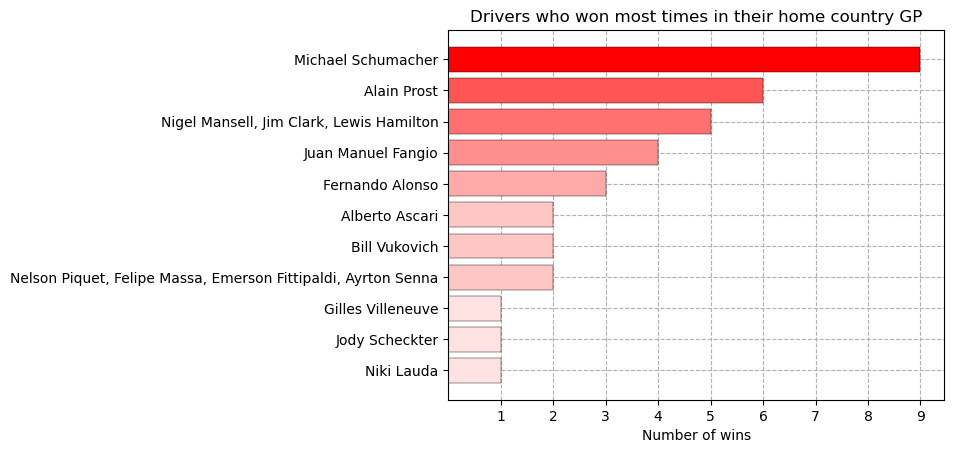

In [131]:
#get data from csv
drivers = []
wins = []
colors = []
for index, row in df.iterrows():
    driver = row['drivers']
    drivers.append(driver)
    win = row['wins']
    wins.append(win)
    if( (index>0) and (win==wins[index-1]) ):
        colors.append(color)
    else:
        color=(1, 1-(win/9), 1-(win/9) )
        colors.append(color)
    print(driver, color)
    
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(drivers))
x_pos = wins
ax.barh(y_pos, x_pos, align='center', color=colors, edgecolor='black', linewidth=0.3, zorder=2)
ax.set_xticks(range(1,10))
ax.set_yticks(y_pos)
ax.set_yticklabels(drivers);
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of wins')
ax.set_title('Drivers who won most times in their home country GP')
ax.grid(linestyle='--', zorder=0)

plt.show()
if savePlot:
    fig.savefig('own-nation-gp-winner.png', format='png', bbox_inches = "tight")

In [132]:
df = pd.read_csv(avg_position, encoding='utf-8')
df.head()

name  avgPosition
0  Juan Manuel Fangio     2.250000
1      Jackie Stewart     2.952381
2         Alain Prost     2.958042
3        Ayrton Senna     3.148148
4       Stirling Moss     3.459459

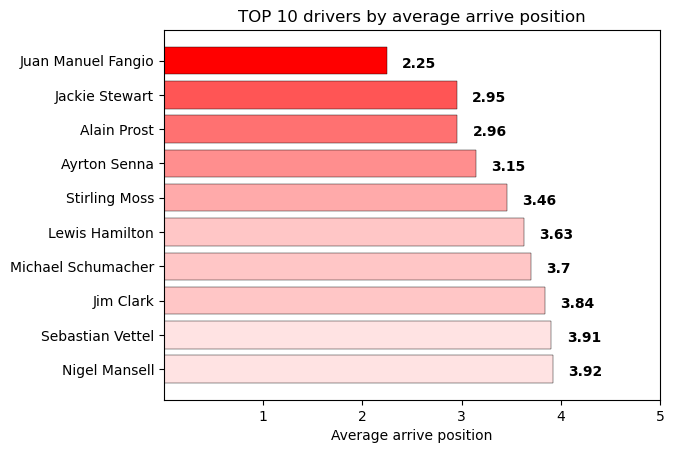

In [133]:
#get data from csv
drivers = []
avgs = []
for index, row in df.iterrows():
    driver = row['name']
    drivers.append(driver)
    avg = row['avgPosition']
    avgs.append(avg)
    color=(1, 0+(index/10), 0+(index/10) )
    colors.append(color)
    
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(drivers))
x_pos = avgs

ax.barh(y_pos, x_pos, align='center', color=colors, edgecolor='black', linewidth=0.3, zorder=2)
ax.set_xticks(range(1,6))
ax.set_yticks(y_pos)
ax.set_yticklabels(drivers);
ax.invert_yaxis()  # labels read top-to-bottom
    
ax.set_xlabel('Average arrive position')
ax.set_title('TOP 10 drivers by average arrive position')

#print values on bars
for i, v in enumerate(avgs):
    v = round(v,2)
    ax.text(v+.15, i + .20, str(v), color='black', fontweight='bold')

plt.show()
if savePlot:
    fig.savefig('top10-avg-arrivepos.png', format='png', bbox_inches = "tight")